In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [26]:
benchmark_file = '/mnt/d/Downloads/benchmark_results_cg2.csv'
data = pd.read_csv(benchmark_file, sep=',', header=0)
data.head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,CGInsertTime,DefaultSearchTime,CGSearchTime,DefaultSearchSuccess,CGSearchSuccess,Tot Threads
0,16384,0.2,32,8,0.389248,1.088220,0.047104,0.081920,1,1,256
1,16384,0.2,32,256,0.221184,1.010690,0.014336,0.013312,1,1,8192
2,16384,0.2,128,8,0.397312,1.093540,0.021504,0.030720,1,1,1024
3,16384,0.2,256,8,0.312320,0.964608,0.019456,0.019680,1,1,2048
4,16384,0.2,512,8,0.290816,0.957216,0.017600,0.015648,1,1,4096


In [27]:
# Add a new column for throughput which is Time Column/ NumElements
for column in data.columns:
    if "Time" in column:
        data['Throughput_' + column] = 1000*data['NumElements'] / data[column]
        
data.head()

,NumElements,LoadFactor,ThreadsPerBlock,NumBlocks,DefaultInsertTime,CGInsertTime,DefaultSearchTime,CGSearchTime,DefaultSearchSuccess,CGSearchSuccess,Tot Threads,Throughput_DefaultInsertTime,Throughput_CGInsertTime,Throughput_DefaultSearchTime,Throughput_CGSearchTime
0,16384,0.2,32,8,0.389248,1.088220,0.047104,0.081920,1,1,256,4.209142e+07,1.505578e+07,3.478261e+08,2.000000e+08
1,16384,0.2,32,256,0.221184,1.010690,0.014336,0.013312,1,1,8192,7.407407e+07,1.621071e+07,1.142857e+09,1.230769e+09
2,16384,0.2,128,8,0.397312,1.093540,0.021504,0.030720,1,1,1024,4.123711e+07,1.498253e+07,7.619048e+08,5.333333e+08
3,16384,0.2,256,8,0.312320,0.964608,0.019456,0.019680,1,1,2048,5.245902e+07,1.698514e+07,8.421053e+08,8.325203e+08
4,16384,0.2,512,8,0.290816,0.957216,0.017600,0.015648,1,1,4096,5.633803e+07,1.711630e+07,9.309091e+08,1.047035e+09


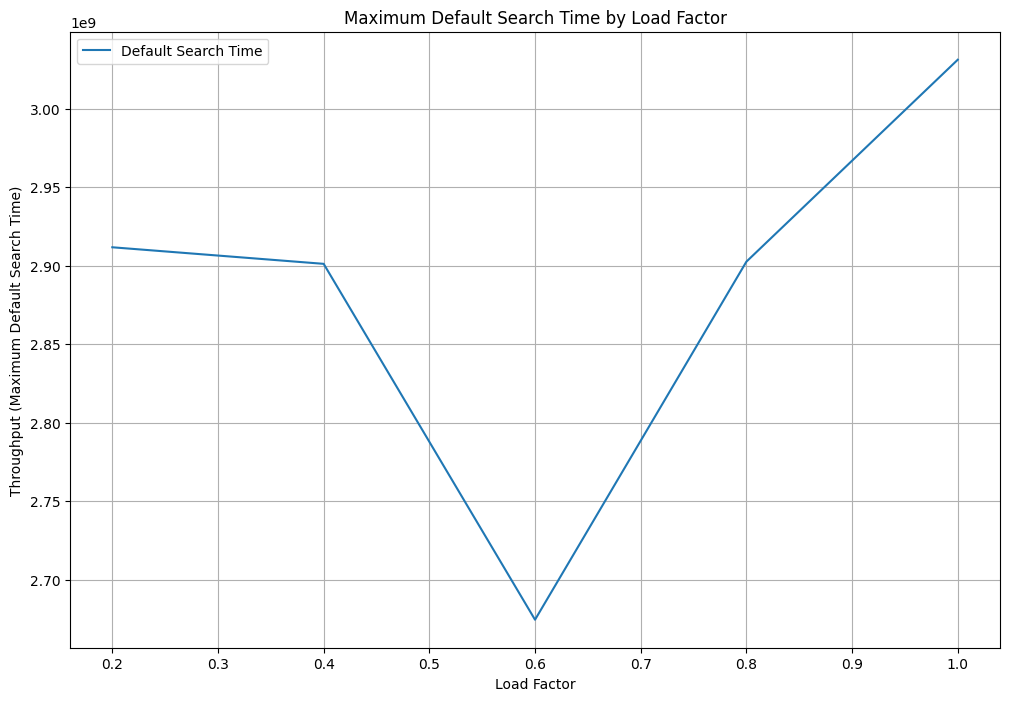

In [50]:
# Plot the graphs
# x-axis - LoadFactor
# y-axis - Throughput_DefaultSearchTime
# In the same graph, plot the throughput different NumElements. Pick the maximum Throughput_DefaultSearchTime for each LoadFactor

# Filter rows to pick a particular N
N = 67108864
data_N = data[data['NumElements'] == N]

grouped_data = data_N.groupby(['LoadFactor', 'NumElements'])[
    'Throughput_DefaultSearchTime'].max().reset_index()

grouped_data_2 = grouped_data.groupby(['LoadFactor'])[
    'Throughput_DefaultSearchTime'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(grouped_data_2['LoadFactor'], grouped_data_2['Throughput_DefaultSearchTime'], label='Default Search Time')
 
plt.title('Maximum Default Search Time by Load Factor')
plt.xlabel('Load Factor')
plt.ylabel('Throughput (Maximum Default Search Time)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [51]:
grouped_data

,LoadFactor,NumElements,Throughput_DefaultSearchTime
0,0.2,67108864,2.911814e+09
1,0.4,67108864,2.901265e+09
2,0.6,67108864,2.674608e+09
3,0.8,67108864,2.902645e+09
4,1.0,67108864,3.031265e+09


In [36]:
pivot_data

NumElements,16384,131072,1048576,16777216,67108864
LoadFactor,,,,,
0.2,8.505828e+08,2.437760e+09,2.653967e+09,2.420121e+09,2.298355e+09
0.4,8.235907e+08,4.220617e+09,2.594564e+09,2.432722e+09,2.299600e+09
0.6,7.315553e+08,3.884774e+09,3.184995e+09,2.180269e+09,2.164606e+09
0.8,6.892406e+08,4.480366e+09,2.264757e+09,2.065155e+09,2.309379e+09
1.0,9.131807e+08,4.350840e+09,4.160329e+09,2.510797e+09,2.324628e+09
